In [1]:
import os
import glob
import pickle
import pandas as pd
import numpy as np
import math
import random
from scipy.stats import circmean
from scipy.stats import ks_2samp
from math import cos, sin
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import cv2
from tqdm import tqdm

In [8]:
animals = ['khorne', 'kratos', 'larsson', 'ninja', 'korra']

In [10]:

path_pkl = r'../../MSES/octopus-odor-guided-search/DATA/SEQ_BDA_PLOTS/drist_data_all.pkl'

pkl = []
with (open(path_pkl, "rb")) as openfile:
    while True:
        try:
            pkl.append(pickle.load(openfile))
        except EOFError:
            break

pkl = pkl[0]
print(pkl[-1])

UBXs, UBYs = [], []
BDA_VX, BDA_VY = [], []
anglesV_ROT_BDA = []
odors = []
anglesU = []
seq_IDs = []
posx, posy = [], []

show = False

for i, lst in enumerate(pkl[0:-1]):
    nseq = lst[0]
    seq = lst[1]
    seq_id = seq + '_' + str(nseq)
    odor = lst[2]
    pos = lst[3]
    bda = lst[4]
    vel = lst[6]

    UX = bda[0][0:-1]
    UY = bda[1][0:-1]

    UBXs = UBXs + UX.tolist()
    UBYs = UBYs + UY.tolist()

    posx = posx + pos[0][0:-1].tolist()
    posy = posy + pos[1][0:-1].tolist()

    seq_id = [seq_id]*len(UX)
    seq_IDs = seq_IDs + seq_id

    if show == True:
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(40,10))

        ## ax1 ##
        ax1.plot((UX)+np.arange(0,len(UX)), UY, color='blue', linewidth=1)

    VX = vel[0]
    VY = vel[1]

    S = (VX**2 + VY**2)**(1/2)

    if show == True:
        ax1.plot((VX/np.max(S))+np.arange(0,len(VX)), VY/np.max(S), color='green', linewidth=1)

        ax1.axhline(y=0, color='grey', linewidth=1)
        ax1.set_ylim(-1,1)
        ax1.set_ylabel(seq + ', ' + str(odor), fontsize=32)

    ## ax2 ##
    VX = VX/S
    VY = VY/S

    if show == True:
        for X, Y in list(zip(UX, UY)):
            ax2.plot([0,X], [0,Y], color='blue', linewidth=1)
        for X, Y in list(zip(VX, VY)):
            ax2.plot([0,X], [0,Y], color='green', linewidth=1)

        ax2.axvline(x=0,color='grey')
        ax2.axhline(y=0,color='grey')

        ax2.set_ylim(-1,1)
        ax2.set_xlim(-1,1)

    ## ax3 ##
    # V #
    angleU = np.arctan2(UX, UY)
    anglesU = anglesU + angleU.tolist()
    rot_matrices = []
    for angle in angleU:
        rot = np.array([[cos(angle), -1*sin(angle)], [sin(angle), cos(angle)]])
        rot_matrices.append(rot)
    RVX, RVY = [], []
    for ROT, X, Y in list(zip(rot_matrices, VX, VY)):
        R = np.dot(ROT, [X,Y])
        RVX.append(R[0])
        RVY.append(R[1])
    BDA_VX = BDA_VX + (RVX*S).tolist()
    BDA_VY = BDA_VY + (RVY*S).tolist()
    RVX = np.array(RVX)
    RVY = np.array(RVY)

    anglesV = []
    for X, Y in list(zip(VX, RVY)):
        anglesV.append(np.arctan2(X, Y))
    anglesV = np.array(anglesV)

    if show == True:
        ax3.hist(anglesV, bins=25, range=[-1*np.pi, np.pi])

    anglesRV = []
    for X, Y in list(zip(RVX, RVY)):
        anglesRV.append(np.arctan2(X, Y))
    anglesV_ROT_BDA = anglesV_ROT_BDA + anglesRV
    anglesRV = np.array(anglesRV)

    if show == True:
        ax4.hist(anglesRV, bins=25, range=[-1*np.pi, np.pi])
        ax4.set_xlim(-1*np.pi, np.pi)

    str_odor = ''
    if odor == 0:
        str_odor = 'odor'
    if odor == 1:
        str_odor = 'no odor'
    odors = odors + len(anglesRV)*[str_odor]

    if show == True:
        plt.show(fig)
        plt.close(fig)

seq_IDs = np.array(seq_IDs)
animal_IDs = [s.split('__')[0] for s in seq_IDs]
anglesU = np.array(anglesU)
BDA_VX = np.array(BDA_VX)
BDA_VY = np.array(BDA_VY)
anglesV_ROT_BDA = np.array(anglesV_ROT_BDA)
posx = np.array(posx)
posy = np.array(posy)*-1 + 1200

df = pd.DataFrame(list(zip(animal_IDs, seq_IDs, odors, anglesV_ROT_BDA, BDA_VX, BDA_VY, anglesU, UBXs, UBYs, posx, posy)),
                   columns = ['animal', 'seq', 'odor', 'heading-offset-angle', 'VX', 'VY', 'anglesU', 'UBX', 'UBY', 'X', 'Y'])

df = df[df['animal'].isin(animals)]

df

idxs0, seqs1, odor2, pos3, bda4, areas5, velocities6, heading_offsets7


,animal,seq,odor,heading-offset-angle,VX,VY,anglesU,UBX,UBY,X,Y
748,khorne,khorne__2020_12_2020__17_41_26_3,odor,-0.566833,-2.303455,3.618887,2.861951,0.276011,-0.961154,402.006287,677.432312
749,khorne,khorne__2020_12_2020__17_41_26_3,odor,-0.248824,-1.530561,6.023719,2.843469,0.293727,-0.955889,405.219116,680.274841
750,khorne,khorne__2020_12_2020__17_41_26_3,odor,-0.726157,-3.648006,4.108022,2.787843,0.346418,-0.938080,408.451492,685.583282
751,khorne,khorne__2020_12_2020__17_41_26_3,odor,-0.615852,-2.611632,3.690492,2.743982,0.387216,-0.921989,413.296707,688.173203
752,khorne,khorne__2020_12_2020__17_41_26_3,odor,-0.205052,-0.916997,4.409178,2.670073,0.454241,-0.890879,417.133621,690.564529
...,...,...,...,...,...,...,...,...,...,...,...
22498,ninja,ninja__2021_05_2021__23_25_14_59,no odor,2.060378,0.335786,-0.178924,2.586073,0.527385,-0.849626,1279.921783,604.101791
22499,ninja,ninja__2021_05_2021__23_25_14_59,no odor,-1.997679,-0.354416,-0.161207,2.592801,0.521657,-0.853156,1279.542130,604.126862
22500,ninja,ninja__2021_05_2021__23_25_14_59,no odor,0.664623,0.371289,0.473861,2.603714,0.512315,-0.858797,1279.760406,603.804443
22501,ninja,ninja__2021_05_2021__23_25_14_59,no odor,-0.120630,-0.078809,0.650137,2.624202,0.494614,-0.869113,1279.684311,604.401611


In [11]:
print(f'unique odor codes {df["odor"].unique()}')

unique odor codes ['odor' 'no odor']


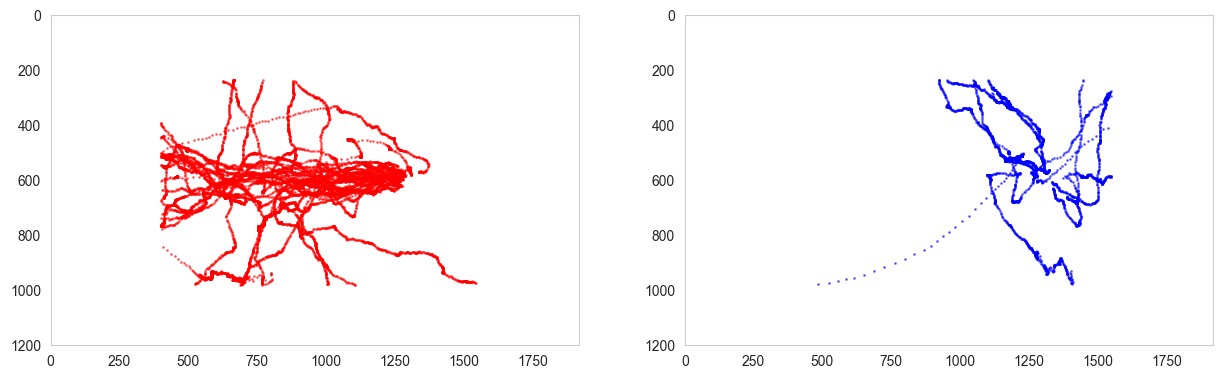

In [18]:
## show X, Y of odor, no odor

fig, axs = plt.subplots(1,2,figsize=(15,10))

x = df[df['odor'] == 'odor']['X']
y = df[df['odor'] == 'odor']['Y']

ax=axs[0]
ax.scatter(x, y, color='red', alpha=0.5, s=1)

x = df[df['odor'] == 'no odor']['X']
y = df[df['odor'] == 'no odor']['Y']

ax=axs[1]
ax.scatter(x, y, color='blue', alpha=0.5, s=1)

for ax in axs:
    ax.grid(color = 'white')
    ax.set_aspect('equal')
    ax.set_xlim(0, 1920)
    ax.set_ylim(1200, 0)

plt.show(fig)
plt.close(fig)

In [20]:
## print all unique seqs for no odor

for seq in df[df['odor'] == 'no odor']['seq'].unique():
    print(seq)

kratos__2020_12_2020__23_05_32_24
larsson__2021_06_2021__22_05_41_27
larsson__2021_06_2021__22_08_24_28
larsson__2021_06_2021__23_51_53_29
ninja__2021_05_2021__00_43_43_49
ninja__2021_05_2021__19_27_44_51
ninja__2021_05_2021__19_49_54_52
ninja__2021_05_2021__20_02_21__53
ninja__2021_05_2021__20_55_57_54
ninja__2021_05_2021__21_55_16_56
ninja__2021_05_2021__23_25_14_59
